src :: https://www.youtube.com/watch?v=QIUxPv5PJOY

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-18')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-07-13,399.820007,381.029999,389.059998,381.910004,47912300.0,381.910004
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300.0,388.230011
2020-07-15,396.989990,385.959991,395.959991,390.899994,38299500.0,390.899994


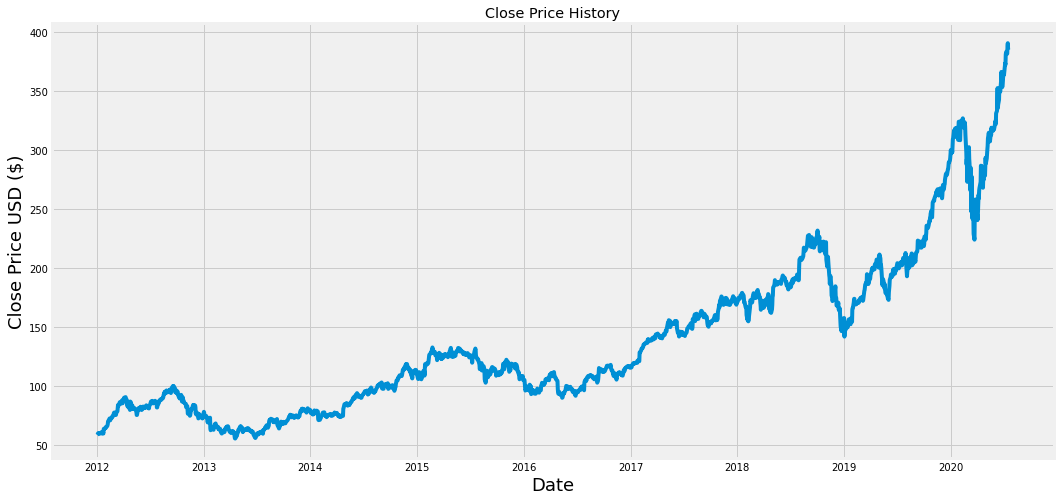

In [3]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00882439],
       [0.00976652],
       [0.01172322],
       ...,
       [1.        ],
       [0.98564651],
       [0.98331892]])

In [6]:
train_data = scaled_data[:training_data_len]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((1660, 60), (1660,))

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1660, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(21))
model.add(Dense(1))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                1071      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 22        
Total params: 31,693
Trainable params: 31,693
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
1660/1660 [==============================] - 7s 4ms/step - loss: 0.0016
Epoch 2/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.7278e-04
Epoch 3/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.4643e-04
Epoch 4/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.5065e-04
Epoch 5/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.6743e-04
Epoch 6/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.3588e-04
Epoch 7/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.2204e-04
Epoch 8/10
1660/1660 [==============================] - 6s 4ms/step - loss: 1.1007e-04
Epoch 9/10
1660/1660 [==============================] - 7s 4ms/step - loss: 1.1000e-04
Epoch 10/10
1660/1660 [==============================] - 7s 4ms/step - loss: 1.3435e-04


In [12]:
training_data_len

1720

In [13]:
test_data = scaled_data[training_data_len-60:]
x_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [14]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.255147191472265

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

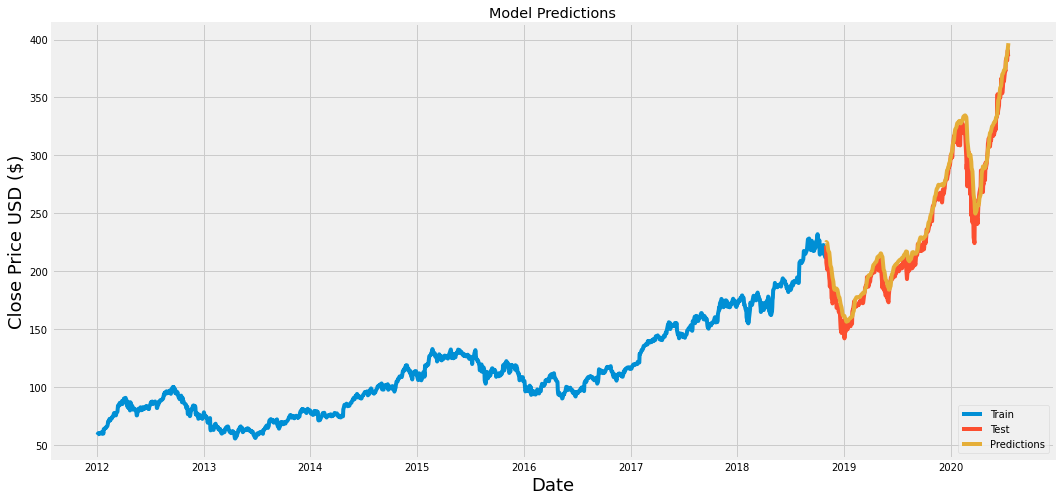

In [18]:
plt.figure(figsize=(16, 8))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()